<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___


* 정규방정식이나 SVD방법은 샘플 수와 특성 수에 선형적인 관계를 가지므로 수백만 개의 특성을 가진 훈련 세트의 경우는 계산복잡도 높다

* 확률적 경사 하강법(SGD), 미니배치 경사 하강법, 배치 경사 하강법사용 가능

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___

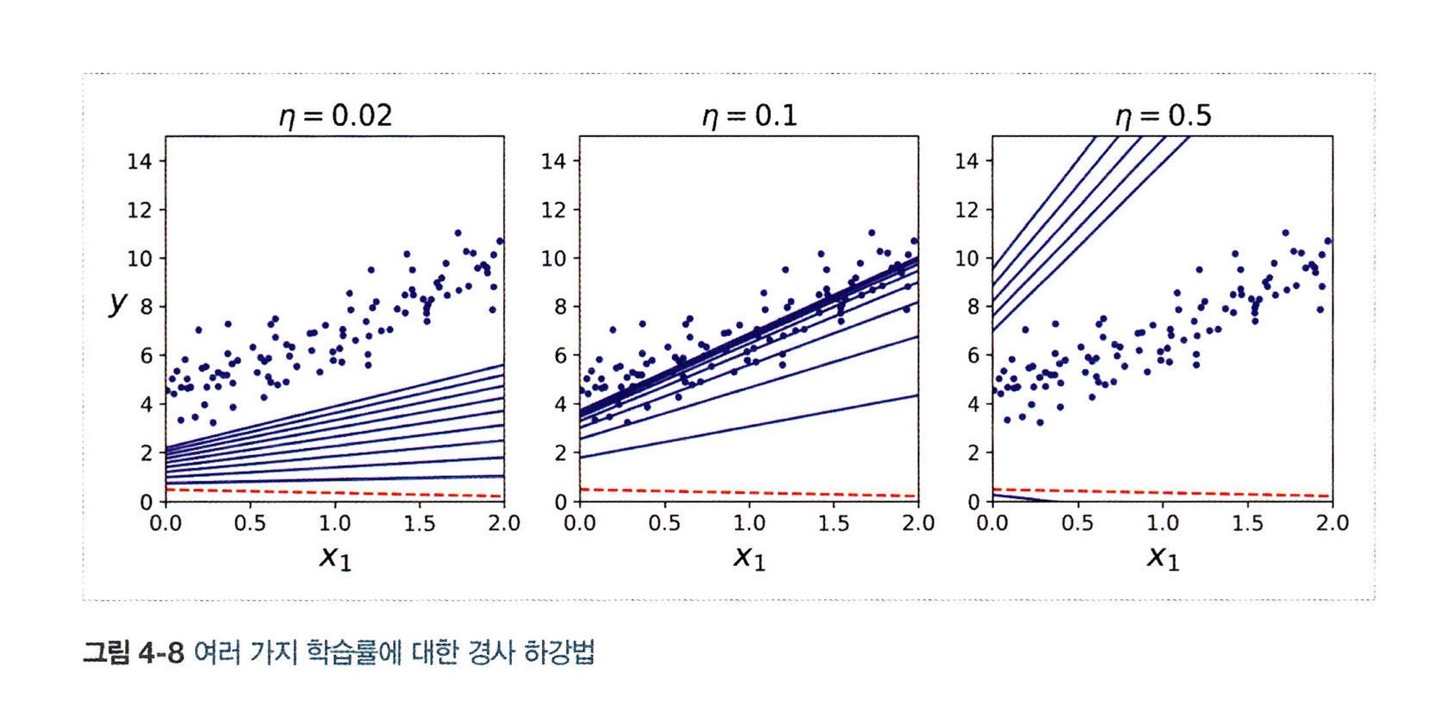

* 검증 오차(그래프와 점 간의 차이)가 일정하게 상승하는 것은 위 그림의 맨 오른쪽 경우에 해당한다. 이는 학습률이 너무 높아 발산하고 있다는 것을 의미한다.

* 해결방법
  + 그리드 탐색을 사용하여 적절한 학습률로 낮춘다.
  + 훈련 에러가 올라가지 않는다면 과대적합된 것 -> 훈련 멈춘다.

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___

* 우선 훈련 오차가 높다는 것은 모델이 데이터를 제대로 학습하지 못한 것으로 과소적합된 상태이므로 높은 편향을 가진 모델이다.

<br>

-> 하이퍼파라미터 𝛼 감소시켜야 한다. 

- 𝛼 : 모델을 얼마나 많이 규제할지 조정, 증가할수록 직선에 가까움(분산 줄고 편향 커짐)

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷

* 규제가 약간 있는 것이 대부분의 경우에 좋아 => 평범한 선형 회귀 대신 릿지 회귀
* 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심 => 릿지 회귀 대신 라쏘 회귀
* 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때 => 라쏘 회귀 대신 엘라스틱넷

### **5. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

In [ ]:
import numpy as np
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [ ]:
np.random.seed(2042)

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [ ]:
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break